In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv("../../dataset/supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## mengatur Datetime 

In [7]:
# Mengubah kolom 'Date' dan 'Time' menjadi format datetime
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.time

# Menggabungkan 'Date' dan 'Time' menjadi 'Datetime'
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))

# Mendapatkan jam dari kolom 'Datetime'
df["Hour"] = df["Datetime"].dt.hour

# Mendefinisikan bins dan labels
time_bins = [0, 10, 14, 24]
time_labels = ["Morning", "Afternoon", "Evening"]

# Mengkategorikan waktu ke dalam bins
df["time_category"] = pd.cut(df["Hour"], bins=time_bins, labels=time_labels, right=False, include_lowest=True)

# Menampilkan hasil
print(df[['Hour', 'time_category', 'Datetime']])

     Hour time_category            Datetime
0      13     Afternoon 2019-01-05 13:08:00
1      10     Afternoon 2019-03-08 10:29:00
2      13     Afternoon 2019-03-03 13:23:00
3      20       Evening 2019-01-27 20:33:00
4      10     Afternoon 2019-02-08 10:37:00
..    ...           ...                 ...
995    13     Afternoon 2019-01-29 13:46:00
996    17       Evening 2019-03-02 17:16:00
997    13     Afternoon 2019-02-09 13:22:00
998    15       Evening 2019-02-22 15:33:00
999    13     Afternoon 2019-02-18 13:28:00

[1000 rows x 3 columns]


In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,time_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,Afternoon
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,Afternoon


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

## Check unique values

In [10]:
for column in df.columns:
    if df[column].dtype != 'float64' and df[column].dtype != 'int64' and df[column].dtype != 'datetime64[ns]' and column not in ["Invoice ID",'Time']: 
        unique_val = df[column].unique()
        print("**********")
        print(f"Feature: {column}")
        print(f"Unique values: {unique_val}")
        print(f"Number of unique: {df[column].nunique()}")  

**********
Feature: Branch
Unique values: ['A' 'C' 'B']
Number of unique: 3
**********
Feature: City
Unique values: ['Yangon' 'Naypyitaw' 'Mandalay']
Number of unique: 3
**********
Feature: Customer type
Unique values: ['Member' 'Normal']
Number of unique: 2
**********
Feature: Gender
Unique values: ['Female' 'Male']
Number of unique: 2
**********
Feature: Product line
Unique values: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Number of unique: 6
**********
Feature: Payment
Unique values: ['Ewallet' 'Cash' 'Credit card']
Number of unique: 3
**********
Feature: Hour
Unique values: [13 10 20 18 14 11 17 16 19 15 12]
Number of unique: 11
**********
Feature: time_category
Unique values: ['Afternoon', 'Evening']
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']
Number of unique: 2


In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,time_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,Afternoon
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,Afternoon


### Melihat hasil penjualan tiap produk 

In [12]:
df_product_total = df[['Product line','Total','Quantity']]
df_product_total.groupby('Product line').sum().reset_index()
# df_total = df_product_total.groupby('Product line')['Total'].sum().reset_index().sort_values(by = 'Total',ascending=False)

,Product line,Total,Quantity
0,Electronic accessories,54337.5315,971
1,Fashion accessories,54305.8950,902
2,Food and beverages,56144.8440,952
3,Health and beauty,49193.7390,854
4,Home and lifestyle,53861.9130,911
5,Sports and travel,55122.8265,920


dari hasil diatas harga total dari semua transaksi tiap jenis product yang ada pada df ini adalah transaksi makanan dan minuman sebanyak  

In [13]:
df.Branch.value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

# Melihat data product yang sering di cari di tiap jam 

In [14]:
df.Hour.unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [15]:

countper_hour=df.groupby('Product line')['Hour'].value_counts().reset_index()
countper_hour

,Product line,Hour,count
0,Electronic accessories,18,20
1,Electronic accessories,11,18
2,Electronic accessories,10,17
3,Electronic accessories,20,16
4,Electronic accessories,12,16
...,...,...,...
61,Sports and travel,10,15
62,Sports and travel,14,14
63,Sports and travel,17,13
64,Sports and travel,18,12


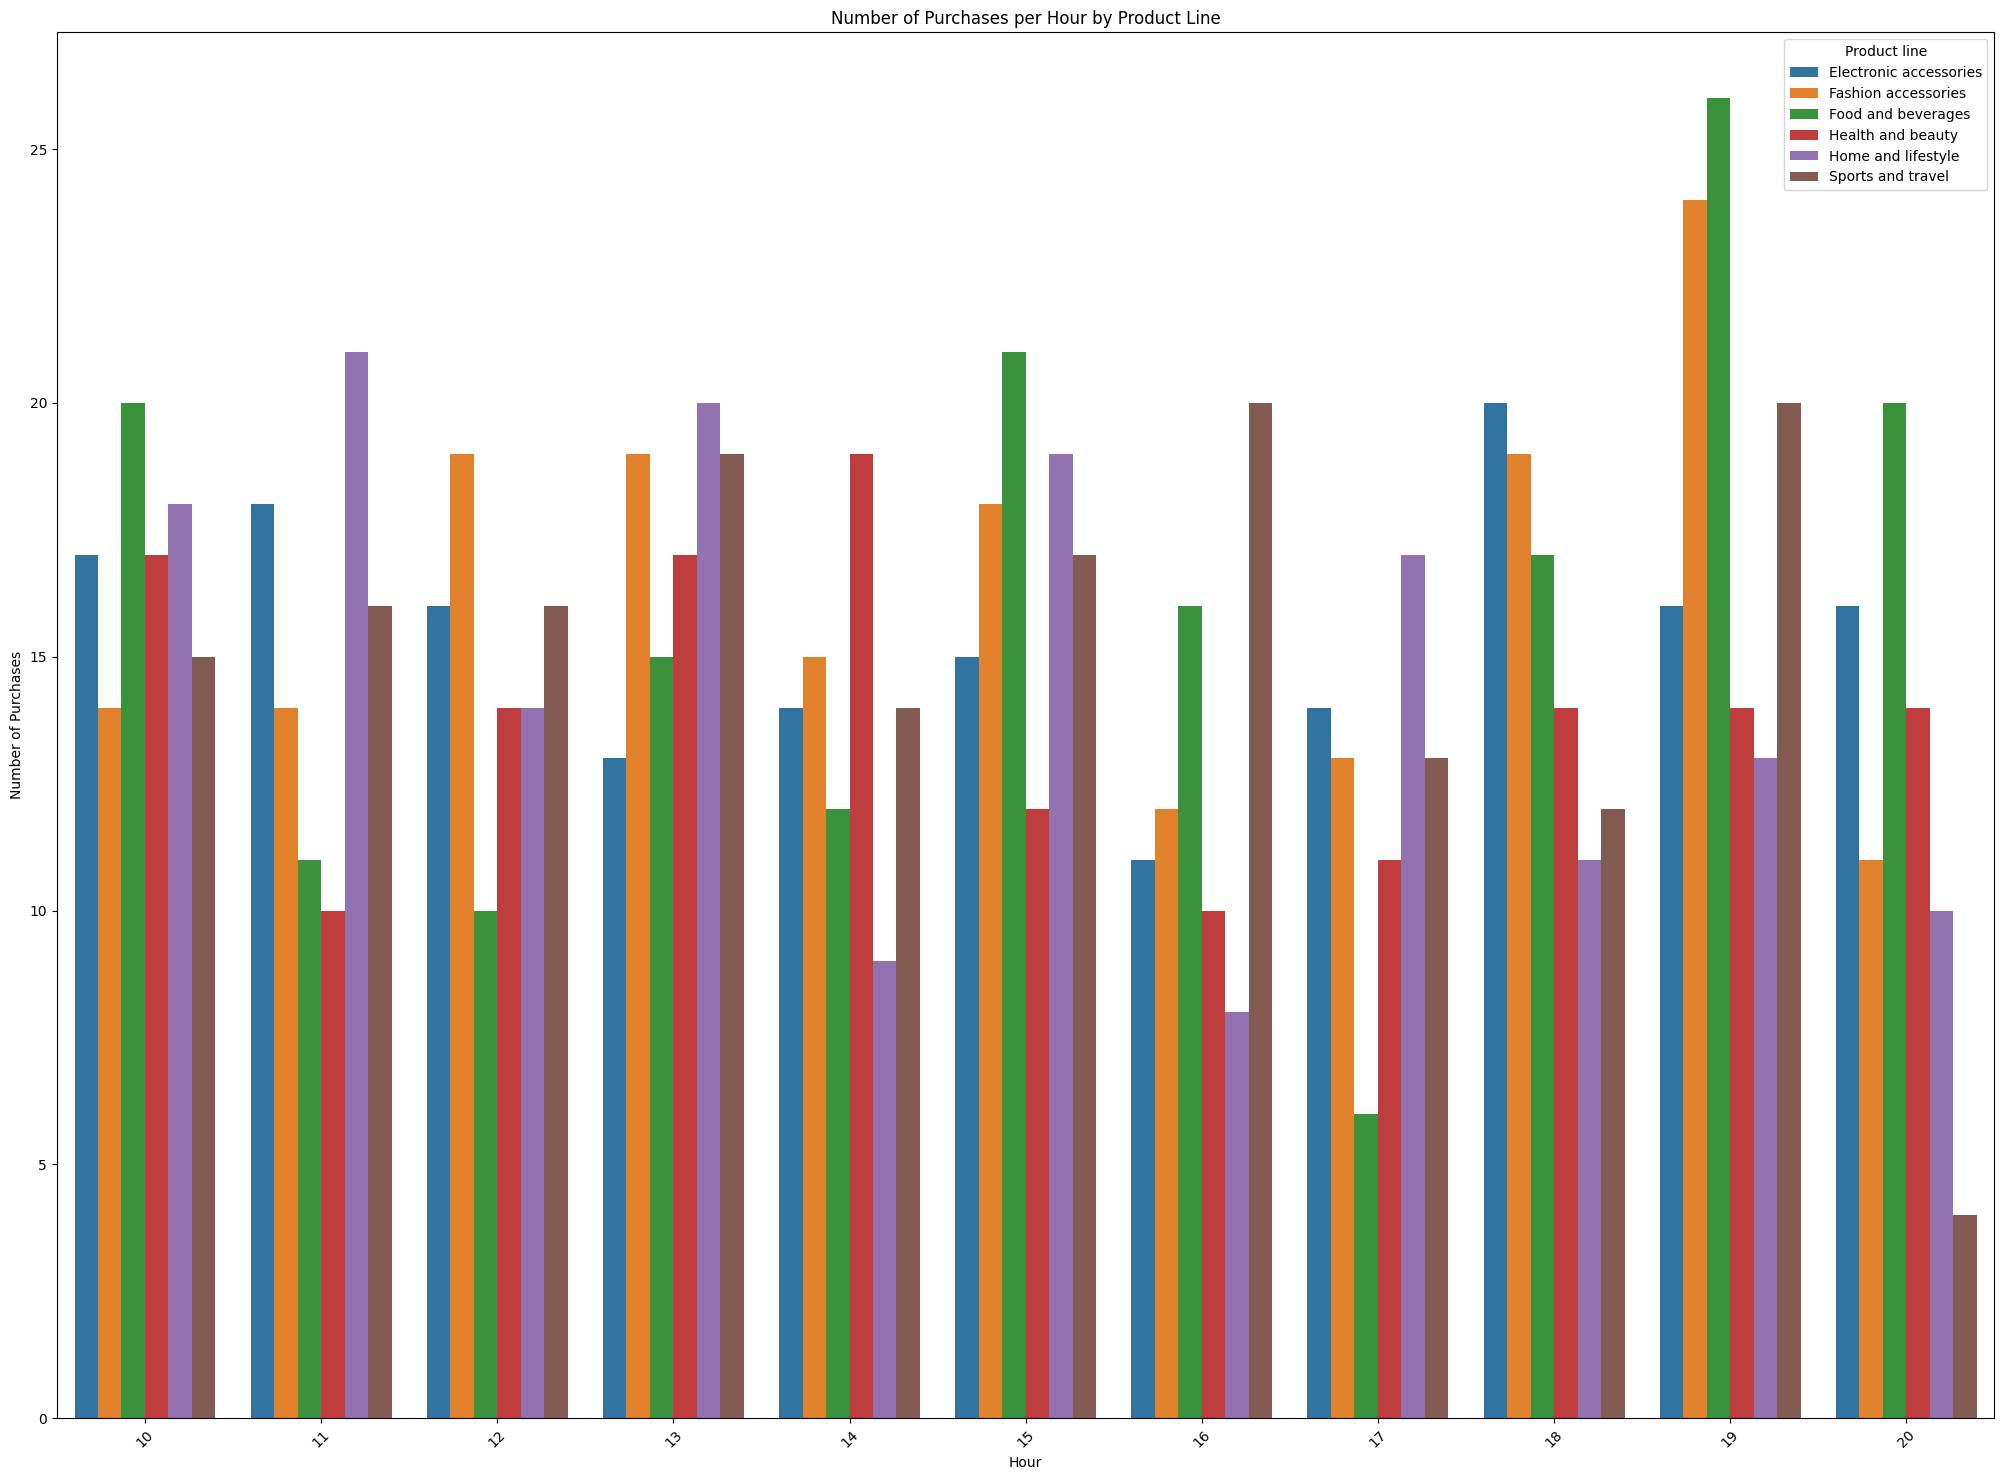

In [16]:
plt.figure(figsize=(25,18)) 
sns.barplot(x='Hour', y='count', hue='Product line', data=countper_hour)
plt.title('Number of Purchases per Hour by Product Line')
plt.xlabel('Hour')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)  
plt.show()

In [17]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,time_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,Afternoon
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,Afternoon


### City Analyst

In [22]:
# How many branch in each city
print(df.City.unique())
print(df.Branch.unique())

df_branch = df.groupby('City')['Branch'].value_counts().reset_index()
print(df_branch)

['Yangon' 'Naypyitaw' 'Mandalay']
['A' 'C' 'B']
        City Branch  count
0   Mandalay      B    332
1  Naypyitaw      C    328
2     Yangon      A    340


Text(0.5, 1.0, 'Distribution of Tax 5% in each city ')

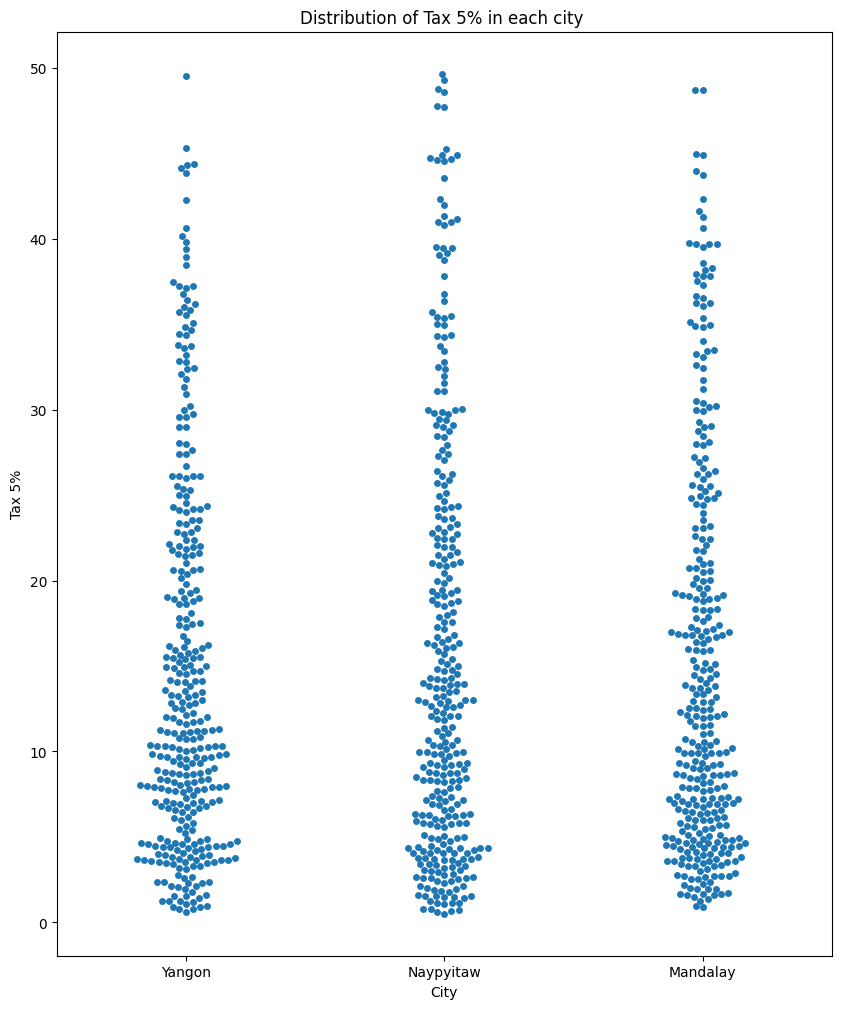

In [26]:
plt.figure(figsize=(10,12))
sns.swarmplot(x= 'City',y='Tax 5%', data= df)
plt.title('Distribution of Tax 5% in each city ')

In [30]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,time_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,Afternoon
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,Afternoon


In [37]:
# Total sales each branch
total_sales_branch = df.groupby('Branch')['Total'].sum().reset_index()
total_sales_branch

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


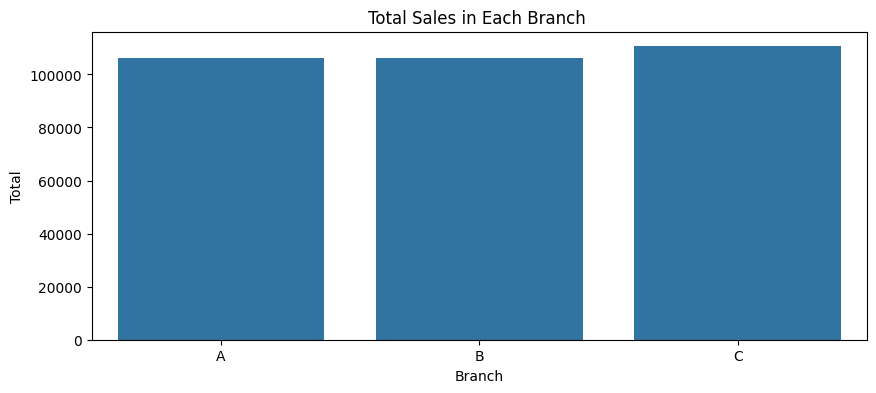

In [41]:
plt.figure(figsize=(10,4))
sns.barplot(x='Branch',y='Total',data=total_sales_branch)
plt.title('Total Sales in Each Branch ')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [48]:
tren_branch = df.groupby(['Date','Branch'])['Total'].sum().unstack()
tren_branch

Branch,A,B,C
Date,,,
2019-01-01,2371.3200,1536.6960,837.1650
2019-01-02,307.0515,1162.8015,475.6500
2019-01-03,937.4085,1016.6940,124.0260
2019-01-04,483.2625,510.5835,629.8425
2019-01-05,2024.5050,486.7590,1025.4195
...,...,...,...
2019-03-26,1187.3400,301.2030,473.9700
2019-03-27,1060.6260,898.8945,943.2990
2019-03-28,1652.9310,95.6655,480.8055


<Axes: title={'center': 'Tren Sales each Branch'}, xlabel='Date'>

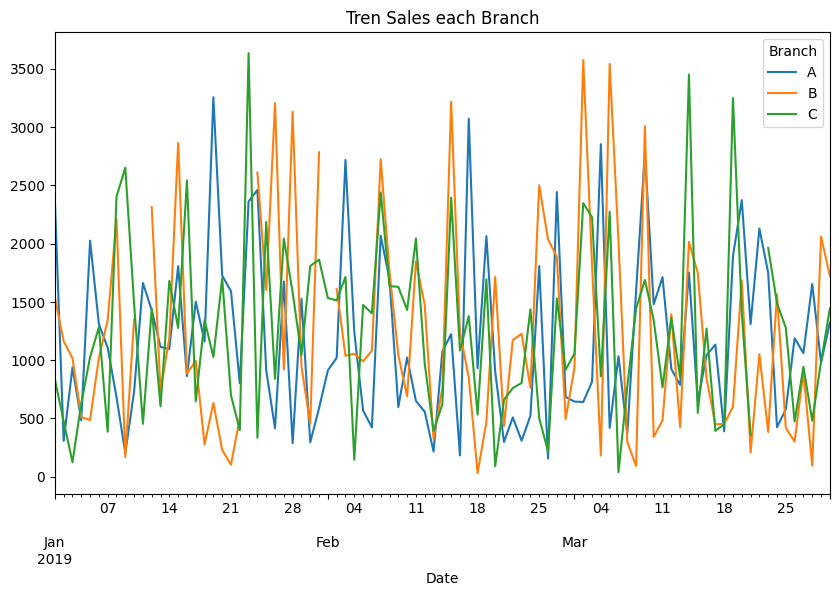

In [50]:
tren_branch.plot(figsize=(10,6),title='Tren Sales each Branch')

### Customer analyst

In [54]:
sales_gender = df.groupby('Gender')['Total'].sum()
print('Distribution sales by gender',sales_gender)

Distribution sales by gender Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


In [55]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,time_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,Afternoon
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,Afternoon


In [62]:
# Looking what product that popular in female 
dfproduct_female = df.loc[df['Gender']=='Female']
dfproduct_female.groupby('Product line')['Gender'].value_counts().reset_index()

,Product line,Gender,count
0,Electronic accessories,Female,84
1,Fashion accessories,Female,96
2,Food and beverages,Female,90
3,Health and beauty,Female,64
4,Home and lifestyle,Female,79
5,Sports and travel,Female,88


In [63]:
# Looking what product that popular in male 
dfproduct_female = df.loc[df['Gender']=='Male']
dfproduct_female.groupby('Product line')['Gender'].value_counts().reset_index()

,Product line,Gender,count
0,Electronic accessories,Male,86
1,Fashion accessories,Male,82
2,Food and beverages,Male,84
3,Health and beauty,Male,88
4,Home and lifestyle,Male,81
5,Sports and travel,Male,78


In [67]:
# payment that most used by customer
df_payment_customer = df.Payment.value_counts()
print(df_payment_customer)

# customer type 
df_customer_type = df['Customer type'].value_counts()
print(df_customer_type)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64


In [69]:
# customer type and payment method
customer_payment = df.groupby(['Payment'])['Customer type'].value_counts().unstack()
customer_payment

Customer type,Member,Normal
Payment,,
Cash,168,176
Credit card,172,139
Ewallet,161,184


## Rating 

<Axes: title={'center': 'Rating Distribution'}, ylabel='Rating'>

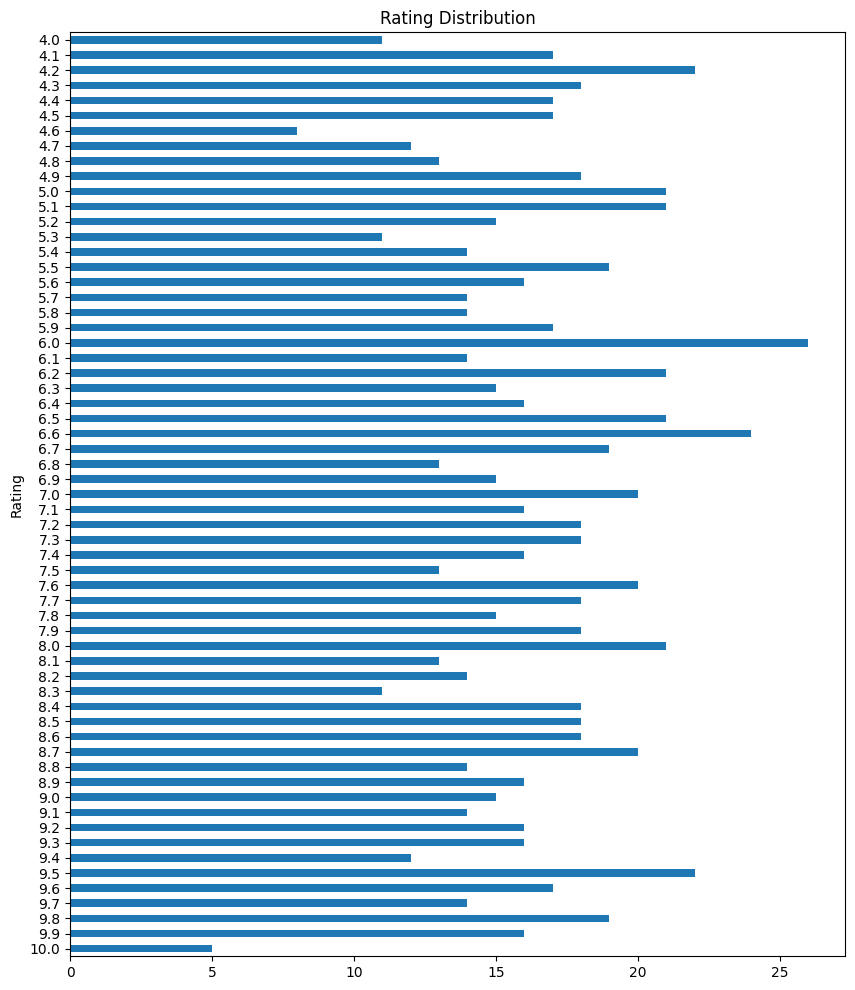

In [95]:
ratings = df['Rating'].value_counts()
ratings = ratings.sort_index(ascending=False)
ratings.plot(kind='barh',figsize=(10,12),title='Rating Distribution')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

<Axes: title={'center': 'Average Ratings each Product type'}, xlabel='Product line'>

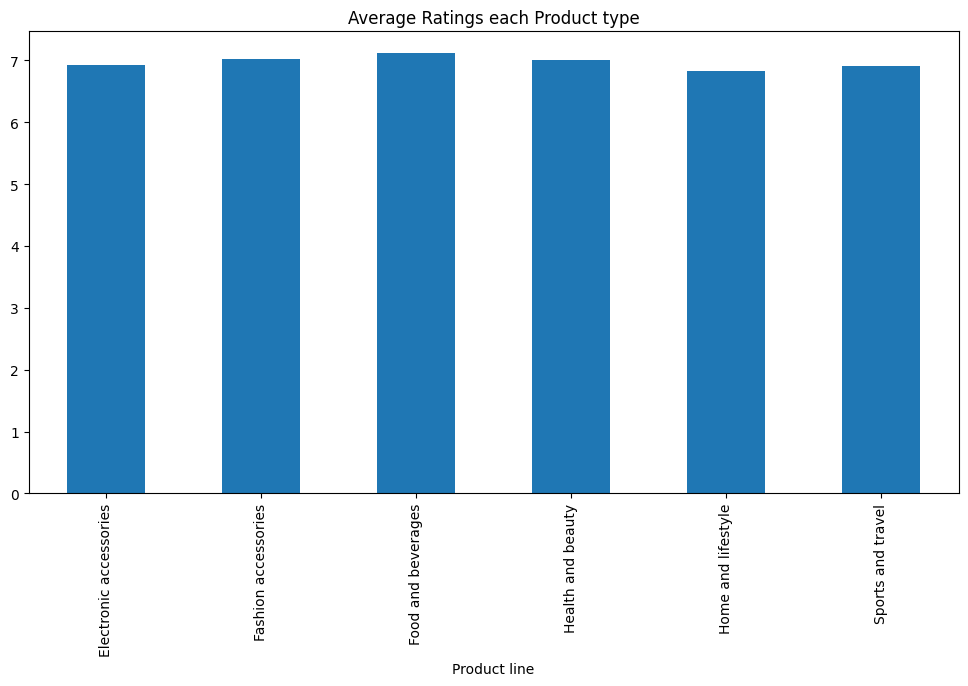

In [105]:
# Average product rating
df_avg_product = df.groupby('Product line')['Rating'].mean()
df_avg_product.plot(kind='bar',figsize=(12,6),title='Average Ratings each Product type')

In [107]:
df_avg_product

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [108]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Datetime', 'Hour', 'time_category'],
      dtype='object')

## Margin Analyst

In [120]:
# analyst gross income and margin each product line
df_product_income = df.groupby('Product line')['gross income'].sum().reset_index()
df_product_margin = df.groupby('Product line')['gross margin percentage'].mean().reset_index()
df_branch_income = df.groupby('Branch')['gross income'].sum().reset_index()
df_branch_margin = df.groupby('Branch')['gross margin percentage'].mean().reset_index()
display(df_product_income)
print('===============')
display(df_product_margin)
print('===============')
display(df_branch_income)
print('===============')
display(df_branch_margin)


,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


,Product line,gross margin percentage
0,Electronic accessories,4.761905
1,Fashion accessories,4.761905
2,Food and beverages,4.761905
3,Health and beauty,4.761905
4,Home and lifestyle,4.761905
5,Sports and travel,4.761905


,Branch,gross income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


,Branch,gross margin percentage
0,A,4.761905
1,B,4.761905
2,C,4.761905
